# Data  Explanation

From this Suicides Rates Overview from 1985 to 2016 data, the intention is to predict number of suicides that in the future and according with the different socio-economic characteristics of every person we can determine how likely they could be of committing suicide.

it contains country, year, sex, age, suicide number, population, suicide/100k pop, country-year, HDI for year, gdp_for_year, gdp_per_capita and generation.

From this suicide rate dataset, we can know the trend of the suicide number by year, and also know which generation/age group has the highest suicide number.

Goal:My intentions are to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

# Data Loading/Importing the lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
rates=pd.read_csv("master.csv")
rates

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


# Raw data visualization

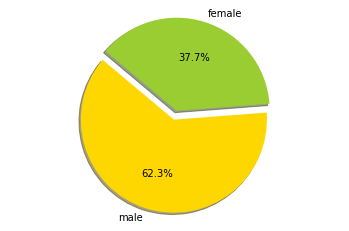

In [3]:
# Data to plot
import matplotlib.pyplot as plt
labels = 'male', 'female'
sizes = [215, 130]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

There is a high number of suicide rate among men than women i.e 62% for men and only 37% for women. 

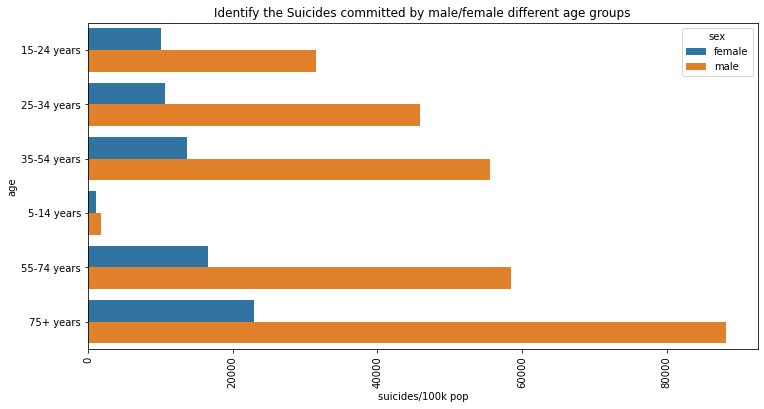

In [4]:
#Group by Age and Countries
plt.figure(figsize=(12, 6));
Age_Country = pd.DataFrame(rates.groupby(['age','sex'],sort=True)['suicides/100k pop'].sum()).reset_index()
plot1 = Age_Country.sort_values(by=['suicides/100k pop','age'], ascending=False)
plot1.reset_index()
g = sns.barplot(x='suicides/100k pop', y='age', data=Age_Country, hue = 'sex');
plt.xticks(rotation=90)

plt.title('Identify the Suicides committed by male/female different age groups');


it is certainly indicative the number of suicides committed by Males is significantly higher when compared to females(The suicide number of the male is higher than female.)

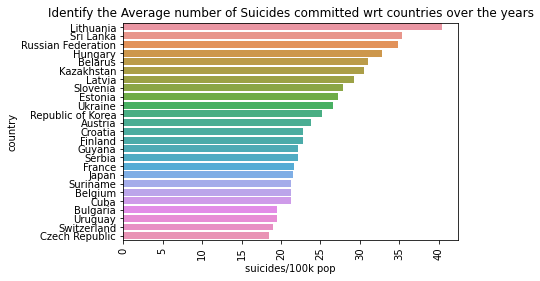

In [5]:
suicide_ctry = pd.DataFrame(rates.groupby(['country'])['suicides/100k pop'].mean()).reset_index()
plot2 = suicide_ctry.sort_values(by=['suicides/100k pop','country'], ascending=False).head(25)
plot2.reset_index()
g = sns.barplot(x='suicides/100k pop', y='country', data=plot2);
plt.xticks(rotation=90)
plt.title('Identify the Average number of Suicides committed wrt countries over the years');

Lithuania and Shrilanka (for a surprise has the highest averages of suicides committed over the years

# Cleaning the  Dataset

In [6]:
#random rows in dataset
rates.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
18438,Panama,2005,female,55-74 years,4,165201,2.42,Panama2005,0.733,"16,374,393,900",5499,Silent
27124,United States,2008,male,75+ years,2531,7072366,35.79,United States2008,NaN,"14,718,582,000,000",52128,Silent
25131,Thailand,2000,female,55-74 years,153,3820685,4.00,Thailand2000,0.648,"126,392,308,498",2169,Silent
9887,Germany,2004,female,15-24 years,129,4726195,2.73,Germany2004,NaN,"2,819,245,095,605",35772,Millenials
1040,Armenia,1996,female,15-24 years,1,310200,0.32,Armenia1996,NaN,"1,596,968,913",458,Generation X


In [7]:
#headings of the feature values
rates.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
# Rows and Columns 
rates.shape

(27820, 12)

In [9]:
#data types and numerical values
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [10]:
rates.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


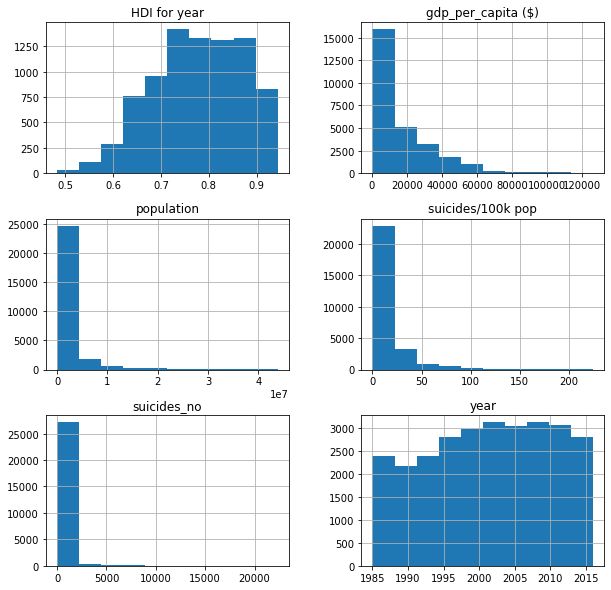

In [11]:
# Numerical data Distribution 
rates.hist(figsize=[10,10]);

In [12]:
# Percentage of Null Values
rates.isna().mean().round(4) * 100

country                0.00
year                   0.00
sex                    0.00
age                    0.00
suicides_no            0.00
population             0.00
suicides/100k pop      0.00
country-year           0.00
HDI for year          69.94
 gdp_for_year ($)      0.00
gdp_per_capita ($)     0.00
generation             0.00
dtype: float64

In [13]:
#Rename columns
rates.rename(columns={'country': 'Country', 
                      'year': 'Year',
                      'sex': 'Sex',
                      'age': 'Age',
                      'suicides_no': 'SuicidesNo',
                      'population': 'Population',
                      'suicides/100k pop': 'Suicides100kPop',
                      'country-year': 'CountryYear',
                      'HDI for year': 'HDIForYear',
                      ' gdp_for_year ($) ': 'GDPForYear$',
                      'gdp_per_capita ($)': 'GDPPerCapita$',
                      'generation': 'Generation'}, inplace=True)

In [14]:
rates

,Country,Year,Sex,Age,SuicidesNo,Population,Suicides100kPop,CountryYear,HDIForYear,GDPForYear$,GDPPerCapita$,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [15]:
rates = rates.drop(['HDIForYear', 'CountryYear'],axis=1)
rates

,Country,Year,Sex,Age,SuicidesNo,Population,Suicides100kPop,GDPForYear$,GDPPerCapita$,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


The column GDPForYear$ that represents the Gross Domestic Product (GDP) per year was string datatype and it was converted to string after removing the commas and setting the datatype
Almost 70% of the data in the HDI for year column is missings that represents 19.456 data points, therefore for the purpose of this analysis I don't consider this column valuable
Furthermore the country-year column does not add any value to the analysis, as this information can be found in the country and year column respectively
Both columns will be dropped of the final dataset to be used for analysis.

# Data visualization

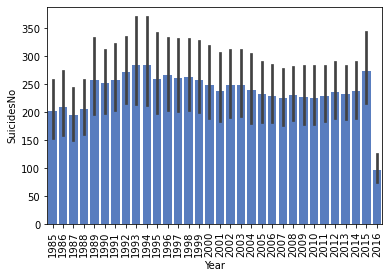

In [16]:
sns.set_color_codes("muted")
sns.barplot(x="Year", y="SuicidesNo", data=rates,
            label="Year Suicides", color="b")
plt.xticks(rotation=90);

This plot shows the suicide rate per year (1986 to 2016) being 1993 and 1994 the years with the highest number of suicides with over 350 people, following by 2015, and the lowest by far 2016

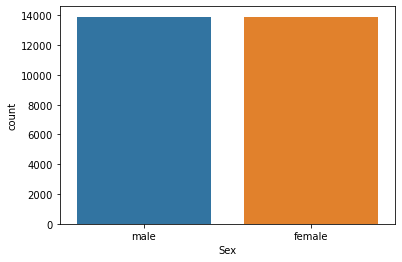

In [17]:
#Distribution according to gender
sns.countplot(x='Sex', data=rates);

This plot shows equal distribution of suicides numbers per gender in the data

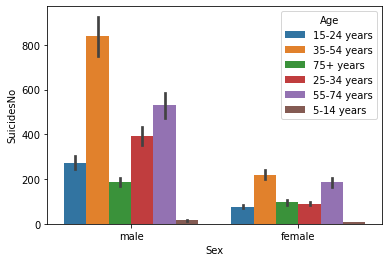

In [18]:
#Distribution according to Age per gender
sns.barplot(x='Sex', y='SuicidesNo', hue='Age', data=rates);

In [19]:
rates.groupby(['Age','Sex']).size()

Age          Sex   
15-24 years  female    2321
             male      2321
25-34 years  female    2321
             male      2321
35-54 years  female    2321
             male      2321
5-14 years   female    2305
             male      2305
55-74 years  female    2321
             male      2321
75+ years    female    2321
             male      2321
dtype: int64

This plot shows the numbers of suicides commited by the people of different age groups depending on their gender.
The highest suicide rate is in the age group of 35-54 years in both genders (Female and Male)
The lowest suicide rate is in the age group of 5-14 years.

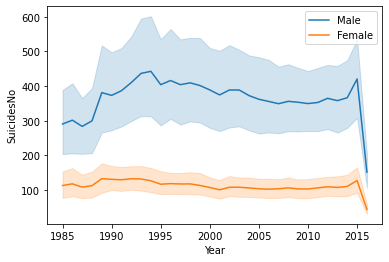

In [20]:
#Distribution according to population per gender accross the years
# Grouping data
male   = rates.loc[rates.loc[:, 'Sex']=='male',:]
female = rates.loc[rates.loc[:, 'Sex']=='female',:]
#Plot
m = sns.lineplot(x='Year', y='SuicidesNo', data=male)
f = sns.lineplot(x='Year', y='SuicidesNo', data=female)

_ = plt.legend(['Male', 'Female'])

This plots shows the change in suicide numbers per gender (Female and Male) population from 1986 to 2015

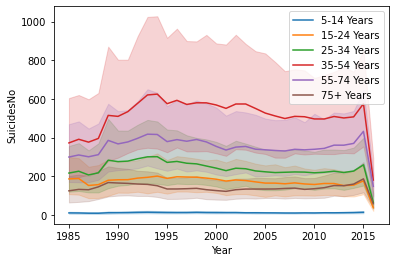

In [21]:
#Distribution according to age per gender accross the years
#Grouping data per age population
age_5_14  = rates.loc[rates.loc[:, 'Age']=='5-14 years',:]
age_15_24 = rates.loc[rates.loc[:, 'Age']=='15-24 years',:]
age_25_34 = rates.loc[rates.loc[:, 'Age']=='25-34 years',:]
age_35_54 = rates.loc[rates.loc[:, 'Age']=='35-54 years',:]
age_55_74 = rates.loc[rates.loc[:, 'Age']=='55-74 years',:]
age_75    = rates.loc[rates.loc[:, 'Age']=='75+ years',:]

#Plot
a = sns.lineplot(x='Year', y='SuicidesNo', data=age_5_14)
b = sns.lineplot(x='Year', y='SuicidesNo', data=age_15_24)
c = sns.lineplot(x='Year', y='SuicidesNo', data=age_25_34)
d = sns.lineplot(x='Year', y='SuicidesNo', data=age_35_54)
e = sns.lineplot(x='Year', y='SuicidesNo', data=age_55_74)
f = sns.lineplot(x='Year', y='SuicidesNo', data=age_75)

_ = plt.legend(['5-14 Years', '15-24 Years', '25-34 Years', '35-54 Years', '55-74 Years', '75+ Years'])

This plots shows the change in suicide numbers per age (From 5 to 75+ years old) population from 1986 to 2015

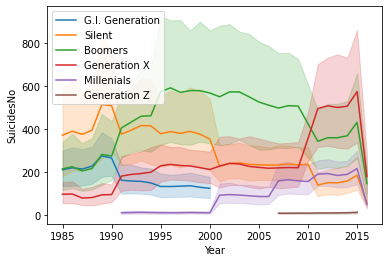

In [22]:
#Distribution according to generation per gender accross the years
#Grouping data per age population
gen_gi = rates.loc[rates.loc[:, 'Generation']=='G.I. Generation',:]
gen_s = rates.loc[rates.loc[:, 'Generation']=='Silent',:]
gen_b = rates.loc[rates.loc[:, 'Generation']=='Boomers',:]
gen_x = rates.loc[rates.loc[:, 'Generation']=='Generation X',:]
gen_m = rates.loc[rates.loc[:, 'Generation']=='Millenials',:]
gen_z = rates.loc[rates.loc[:, 'Generation']=='Generation Z',:]

#Plot
g = sns.lineplot(x='Year', y='SuicidesNo', data=gen_gi)
h = sns.lineplot(x='Year', y='SuicidesNo', data=gen_s)
i = sns.lineplot(x='Year', y='SuicidesNo', data=gen_b)
j = sns.lineplot(x='Year', y='SuicidesNo', data=gen_x)
k = sns.lineplot(x='Year', y='SuicidesNo', data=gen_m)
l = sns.lineplot(x='Year', y='SuicidesNo', data=gen_z)

_ = plt.legend(['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z'])

This plots shows the change in suicide numbers per Generation population from 1986 to 2016

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


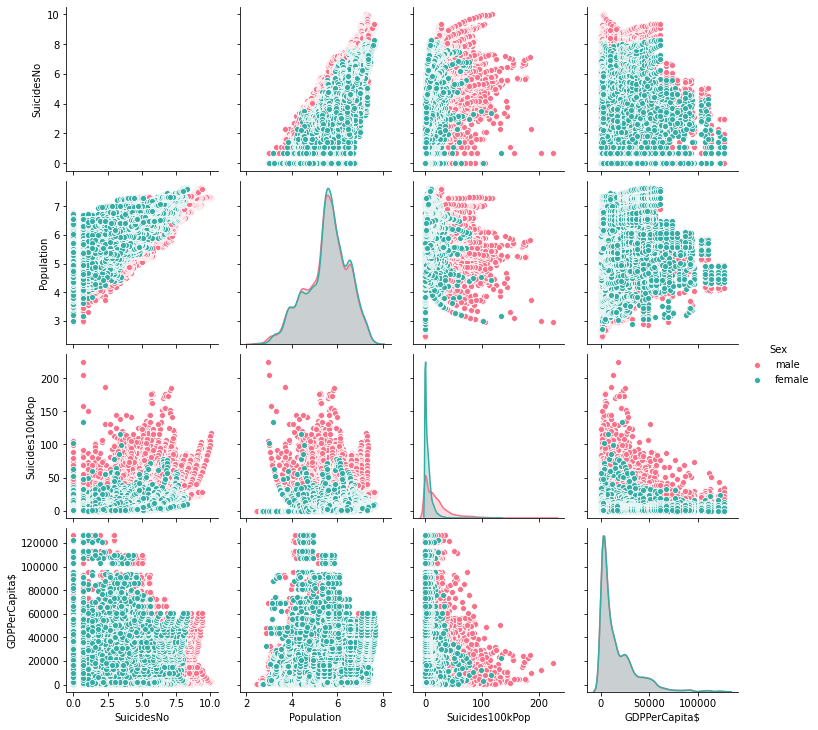

In [23]:
#Distribution of features per gender
m = rates['Sex']
n = rates['Age']
o = rates['SuicidesNo']
p = rates['Population']
q = rates['Suicides100kPop']
r = rates['GDPPerCapita$']

sns.pairplot(pd.DataFrame(list(zip(m, n, np.log(o), np.log10(p), q, r)), 
                        columns=['Sex','Age', 'SuicidesNo', 'Population', 'Suicides100kPop', 
                                 'GDPPerCapita$']), hue='Sex', palette="husl");

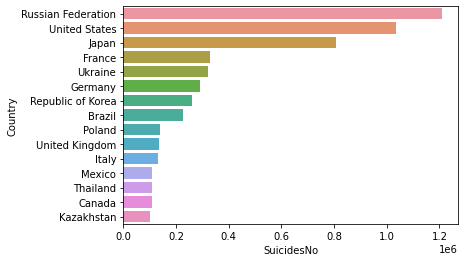

In [24]:
#Distribution Suicides Number per Top 15 countries
#Grouping the Data
suicidesNo=[]
for country in rates.Country.unique():
    suicidesNo.append(sum(rates[rates['Country']==country].SuicidesNo))   
    
#Creating Dataframes
suicidesNo = pd.DataFrame(suicidesNo,columns=['SuicidesNo'])
country = pd.DataFrame(rates.Country.unique(),columns=['Country'])
suicide_country = pd.concat([suicidesNo,country], axis=1)

#Sorting the data
suicide_country=suicide_country.sort_values(by='SuicidesNo',ascending=False)

#Plot
sns.barplot(y=suicide_country.Country[:15],x=suicide_country.SuicidesNo[:15]);

This plots shows the number of suicides in the Top 15 country with the highest numbers of suicides, starting with Russian Federation with over 1mill in total follwed by the United States, and with the lowest number of the 15 countries Canada and Kazakhstan with over 100k across the years

# Correlation

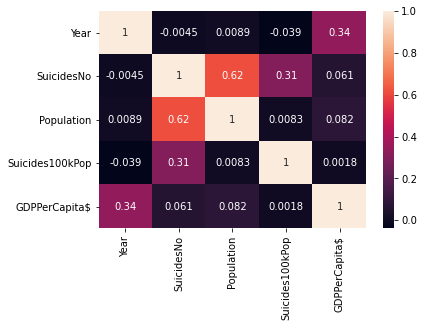

In [25]:

sns.heatmap(rates.corr(), annot=True);

# Feature Engineering

In [26]:
rates.head()

,Country,Year,Sex,Age,SuicidesNo,Population,Suicides100kPop,GDPForYear$,GDPPerCapita$,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


As are many catogorical feature we are converting  all the variables to numerical using  Label Encoder

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
#Get Label Encoder variables per categorical variables in the dataset
suicides = rates
suicides['Country'] = le.fit_transform(suicides.Country)
suicides['Sex'] = le.fit_transform(suicides.Sex)
suicides['Age'] = le.fit_transform(suicides.Age)
suicides['Generation'] = le.fit_transform(suicides.Generation)
suicides.head()

,Country,Year,Sex,Age,SuicidesNo,Population,Suicides100kPop,GDPForYear$,GDPPerCapita$,Generation
0,0,1987,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,1987,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,1987,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,1987,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,1987,1,1,9,274300,3.28,"2,156,624,900",796,0


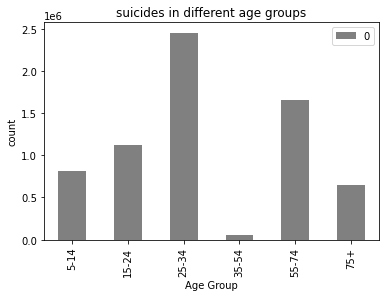

In [29]:
# suicides in different age groups

x1 = rates[rates['Age'] == 0]['SuicidesNo'].sum()
x2 = rates[rates['Age'] == 1]['SuicidesNo'].sum()
x3 = rates[rates['Age'] == 2]['SuicidesNo'].sum()
x4 = rates[rates['Age'] == 3]['SuicidesNo'].sum()
x5 = rates[rates['Age'] == 4]['SuicidesNo'].sum()
x6 = rates[rates['Age'] == 5]['SuicidesNo'].sum()

x = pd.DataFrame([x1, x2, x3, x4, x5, x6])
x.index = ['5-14', '15-24', '25-34', '35-54', '55-74', '75+']
x.plot(kind = 'bar', color = 'grey')

plt.title('suicides in different age groups')
plt.xlabel('Age Group')
plt.ylabel('count')
plt.show()


# Finding independent and dependent variable and placing in x and y


In [30]:
x = rates.iloc[:,:-1]
y = rates.iloc[:,-1]

print(x.shape)
print(y.shape)

(27820, 9)
(27820,)


In [31]:
# Removing the Suicides100kPop Column

rates = rates.drop(['Suicides100kPop','GDPForYear$', 'GDPPerCapita$'], axis = 1)
rates.head(10)


,Country,Year,Sex,Age,SuicidesNo,Population,Generation
0,0,1987,1,0,21,312900,2
1,0,1987,1,2,16,308000,5
2,0,1987,0,0,14,289700,2
3,0,1987,1,5,1,21800,1
4,0,1987,1,1,9,274300,0
5,0,1987,0,5,1,35600,1
6,0,1987,0,2,6,278800,5
7,0,1987,0,1,4,257200,0
8,0,1987,1,4,1,137500,1
9,0,1987,0,3,0,311000,2


# LinearRegression